In [ ]:
import requests

exec(open("p4c_init.py").read())
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

In [2]:
import py4cytoscape as p4c

p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.6.0',
 'py4cytoscapeVersion': '1.5.0'}

In [3]:
import pandas as pd
import numpy as np

In [9]:
edges = pd.read_csv("svo2.csv")
edges = edges.loc[edges['target']!='nan']
edges


,source,interaction,target
0,this,revealed,a basic design principle
1,"the latter "" beam",is,a ccd image
2,that had d’être,had,a functional raison d’être
3,it,was,a layer
4,the mapping,had,a many characteristic
...,...,...,...
210,we,separated,which
211,software engineers,provide,which
212,means,provide,which
213,software engineers,provide,which


In [10]:
nodes = list(edges['source']) + list(edges['target'])
nodes = [{'id': str(n)} for n in set(nodes) if str(n) != "nan"]
nodes = pd.DataFrame(nodes)
nodes

,id
0,an important requirement
1,a manner
2,different customers
3,a dimensional image of the surface
4,some modeling
...,...
241,a mapping
242,that prepared structure
243,that prepared structure with a high degree of ...
244,cadnav


In [11]:

p4c.create_network_from_data_frames(nodes, edges, title="nlp", collection="nlp")
p4c.set_visual_style('Marquee')


Applying default style...
Applying preferred layout


{'message': 'Visual Style applied.'}

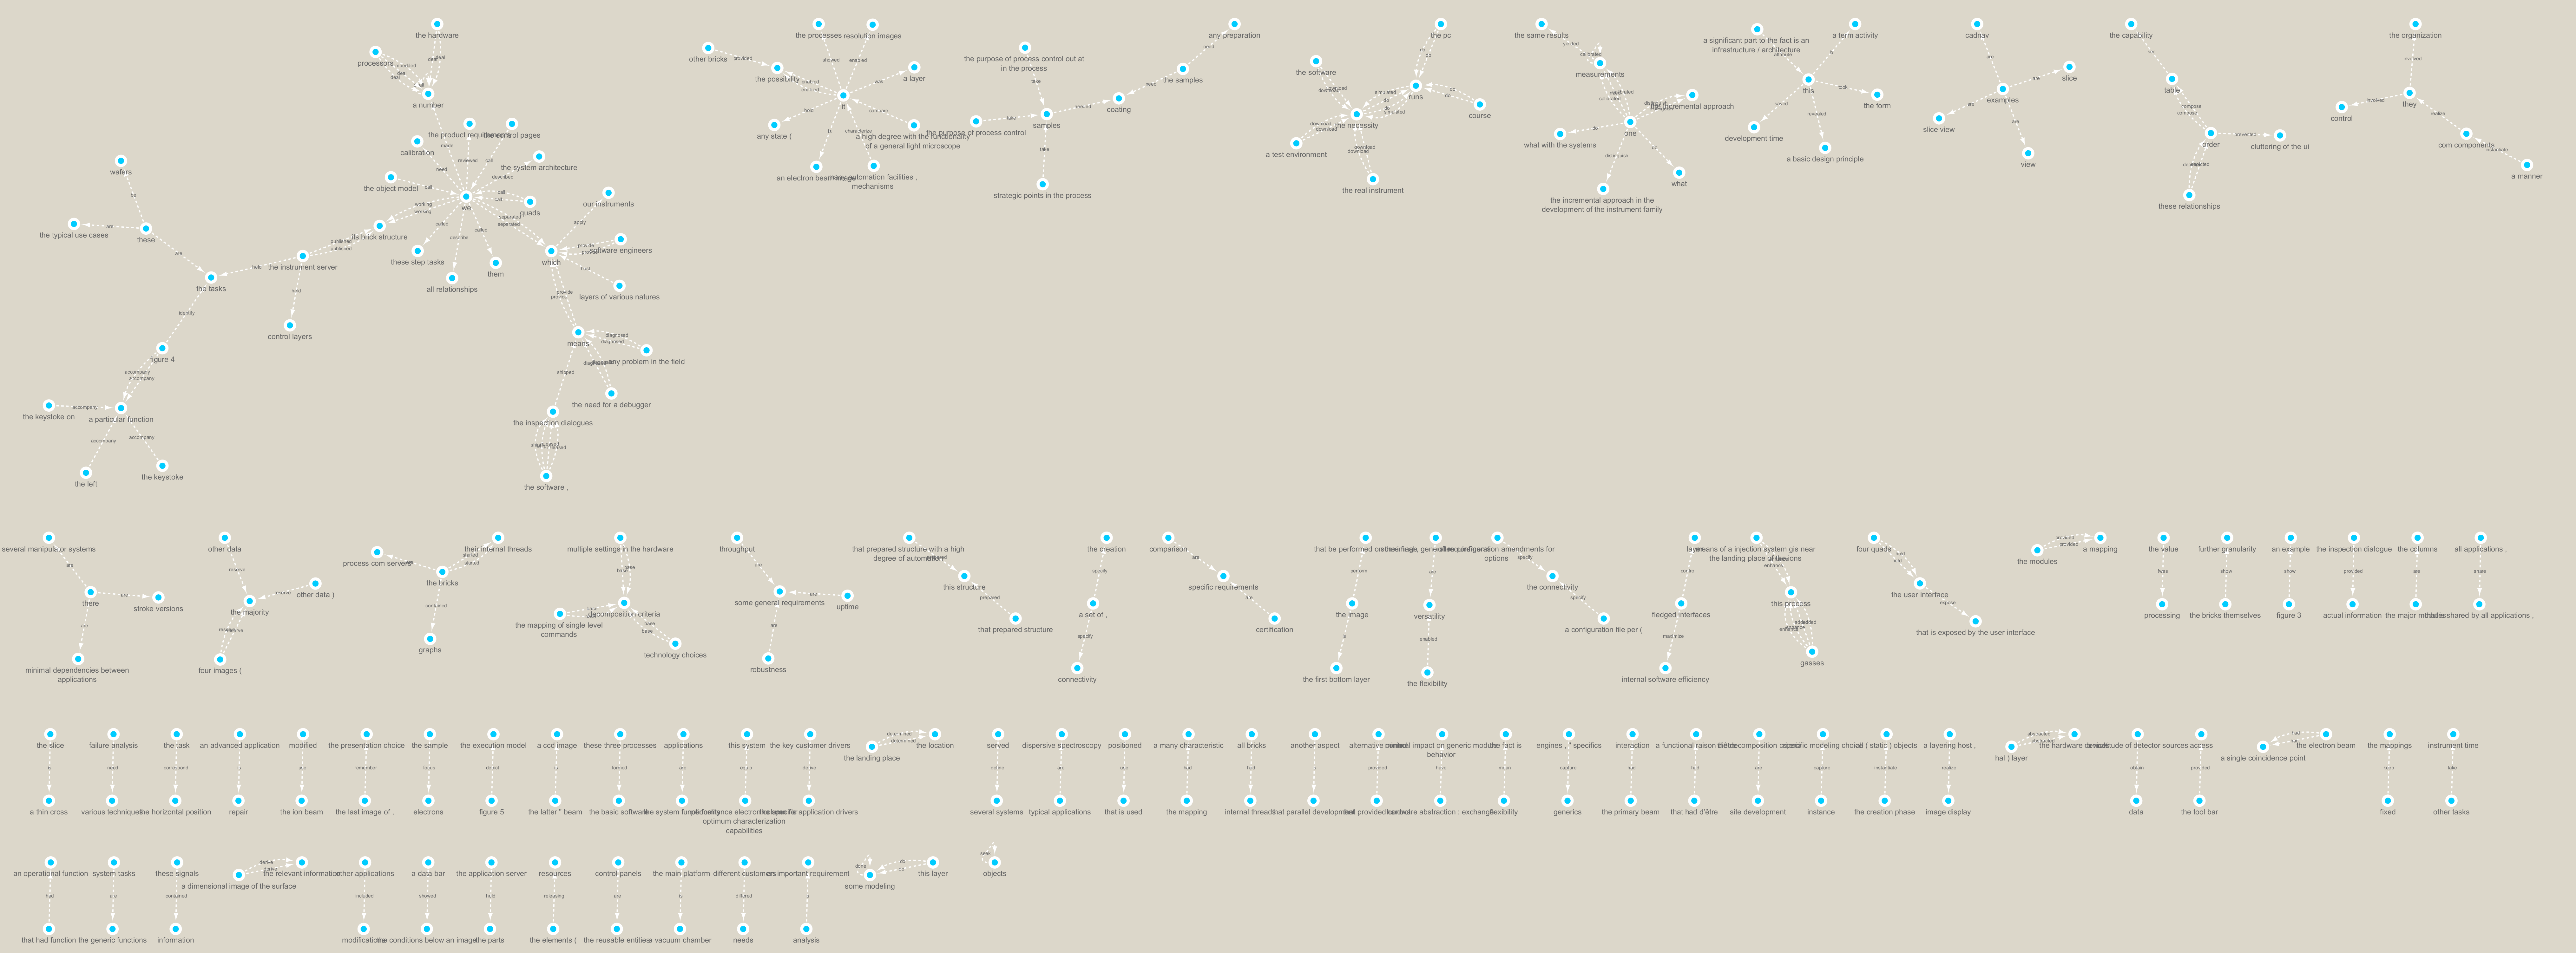

In [12]:
p4c.notebook_export_show_image()